In [37]:
import pandas as pd

colnames=["poisonous","cap-shape","cap-surface","cap-color","bruises?","odor","g-attachment","g-spacing","g-size","g-color","s-shape","s-root","ssa-ring","ssb-ring","sca-ring","scb-ring","veil-t","veil-c","ring-n","ring-t","sp-color","population","habitat"]
data = pd.read_csv("mushrooms.tsv",sep='\t',header=None,names=colnames)

print(data)

     poisonous cap-shape cap-surface cap-color bruises? odor g-attachment  \
0            e         b           s         w        t    l            f   
1            p         x           y         n        t    p            f   
2            e         b           y         w        t    a            f   
3            e         b           s         w        t    l            f   
4            e         x           y         y        t    l            f   
...        ...       ...         ...       ...      ...  ...          ...   
7252         p         k           y         n        f    f            f   
7253         e         k           s         n        f    n            a   
7254         e         f           s         n        f    n            a   
7255         p         k           y         n        f    y            f   
7256         e         x           s         n        f    n            a   

     g-spacing g-size g-color  ... ssb-ring sca-ring scb-ring veil-t veil-c

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7257 entries, 0 to 7256
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   poisonous     7257 non-null   object
 1   cap-shape     7257 non-null   object
 2   cap-surface   7257 non-null   object
 3   cap-color     7257 non-null   object
 4   bruises?      7257 non-null   object
 5   odor          7257 non-null   object
 6   g-attachment  7257 non-null   object
 7   g-spacing     7257 non-null   object
 8   g-size        7257 non-null   object
 9   g-color       7257 non-null   object
 10  s-shape       7257 non-null   object
 11  s-root        7257 non-null   object
 12  ssa-ring      7257 non-null   object
 13  ssb-ring      7257 non-null   object
 14  sca-ring      7257 non-null   object
 15  scb-ring      7257 non-null   object
 16  veil-t        7257 non-null   object
 17  veil-c        7257 non-null   object
 18  ring-n        7257 non-null   object
 19  ring-t

In [39]:
data["poisonous"].replace("e",1,inplace=True) #Kolumna zerowa to test
data["poisonous"].replace("p",0,inplace=True)
data = pd.get_dummies(data)
print(data)

      poisonous  cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_k  \
0             1            1            0            0            0   
1             0            0            0            0            0   
2             1            1            0            0            0   
3             1            1            0            0            0   
4             1            0            0            0            0   
...         ...          ...          ...          ...          ...   
7252          0            0            0            0            1   
7253          1            0            0            0            1   
7254          1            0            0            1            0   
7255          0            0            0            0            1   
7256          1            0            0            0            0   

      cap-shape_s  cap-shape_x  cap-surface_f  cap-surface_g  cap-surface_s  \
0               0            0              0              0        

In [40]:
features=data.columns
features=features[1:]
print(features)

Index(['cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k',
       'cap-shape_s', 'cap-shape_x', 'cap-surface_f', 'cap-surface_g',
       'cap-surface_s', 'cap-surface_y',
       ...
       'population_s', 'population_v', 'population_y', 'habitat_d',
       'habitat_g', 'habitat_l', 'habitat_m', 'habitat_p', 'habitat_u',
       'habitat_w'],
      dtype='object', length=117)


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

X=data[features] #Bierzemy pod uwagę wszystkie cechy
y=data["poisonous"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print(y_pred)

[0 0 0 ... 0 1 0]


<Axes: >

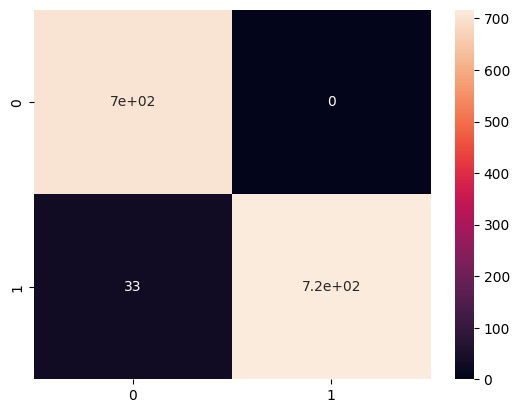

In [42]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       702
           1       1.00      0.96      0.98       750

    accuracy                           0.98      1452
   macro avg       0.98      0.98      0.98      1452
weighted avg       0.98      0.98      0.98      1452



In [44]:
print(features[range(0,21,10)]) # Bierzemy pod uwagę trzy cechy: 'cap-shape_b', 'cap-color_b', 'bruises?_f'
X2=data[features[range(0,21,10)]]
#y=data["poisonous"]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=0)
gnb = GaussianNB()
y_pred2 = gnb.fit(X_train2, y_train2).predict(X_test2)
print(y_pred)

Index(['cap-shape_b', 'cap-color_b', 'bruises?_f'], dtype='object')
[0 0 0 ... 0 1 0]


<Axes: >

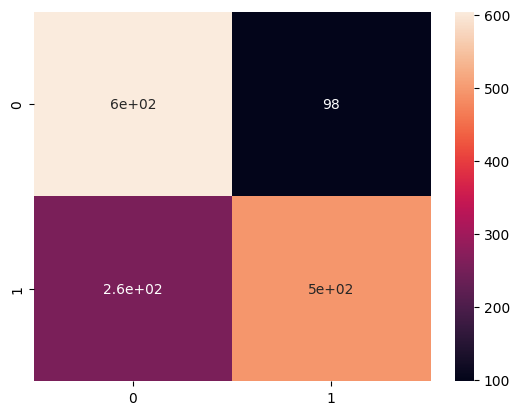

In [45]:
cm = confusion_matrix(y_test2, y_pred2)
sns.heatmap(cm, annot=True)

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.70      0.86      0.77       702
           1       0.83      0.66      0.74       750

    accuracy                           0.76      1452
   macro avg       0.77      0.76      0.76      1452
weighted avg       0.77      0.76      0.75      1452



In [47]:
from sklearn.metrics import accuracy_score
print("Dokładność modelu przy użyciu wszystkich cech",accuracy_score(y_test, y_pred))
print("Dokładność modelu przy użyciu trzech cech",accuracy_score(y_test2, y_pred2))
# Wyniki ewaluacji dla modelu z trzema cechami są mniejsze niż dla modelu ze wszystkimi cechami

Dokładność modelu przy użyciu wszystkich cech 0.9772727272727273
Dokładność modelu przy użyciu trzech cech 0.7568870523415978
